In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622147 entries, 0 to 622146
Data columns (total 9 columns):
lat          622147 non-null float64
lng          622147 non-null float64
desc         622147 non-null object
zip          546137 non-null float64
title        622147 non-null object
timeStamp    622147 non-null object
twp          621881 non-null object
addr         622147 non-null object
e            622147 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 42.7+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
#df.nlargest(5,'zip') it return a dataframe 
df['zip'].value_counts().head(5)

19401.0    42360
19464.0    40888
19403.0    32538
19446.0    30186
19406.0    21140
Name: zip, dtype: int64

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    52470
ABINGTON        37485
NORRISTOWN      34868
UPPER MERION    34073
CHELTENHAM      28672
Name: twp, dtype: int64

In [7]:
df['title'].nunique()

147

In [8]:
x = df['title'].iloc[0]

In [9]:
x.split(':')[0]

'EMS'

In [10]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [11]:
df['Reason'].value_counts()

EMS        309517
Traffic    219636
Fire        92994
Name: Reason, dtype: int64

In [12]:
df['Cause'] = df['title'].apply(lambda title:title.split(':')[1])

In [13]:
df['Cause'].value_counts().head(10)

 VEHICLE ACCIDENT -       142698
 DISABLED VEHICLE -        45845
 FIRE ALARM                35713
 VEHICLE ACCIDENT          34625
 FALL VICTIM               31874
 RESPIRATORY EMERGENCY     31524
 CARDIAC EMERGENCY         30436
 ROAD OBSTRUCTION -        20926
 SUBJECT IN PAIN           18350
 HEAD INJURY               16989
Name: Cause, dtype: int64

In [14]:
df['Cause'].nunique()

95

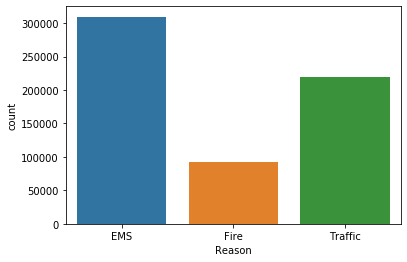

In [15]:
sns.countplot(x='Reason',data = df)

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [17]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [18]:
time.dayofweek

3

In [19]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)

In [20]:
df['Month'] = df['timeStamp'].apply(lambda time:time.month)

In [21]:
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [22]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Cause,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,16,12,3


In [23]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [24]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [25]:
df['Day of Week'].value_counts()

Fri    96779
Thu    92584
Wed    92501
Tue    91833
Mon    90499
Sat    84145
Sun    73806
Name: Day of Week, dtype: int64

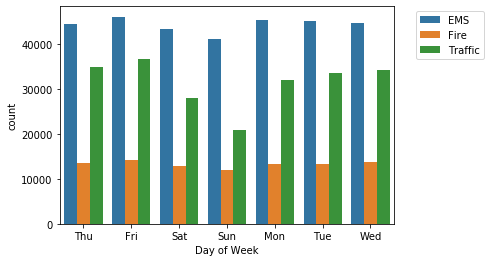

In [26]:
sns.countplot(x='Day of Week',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

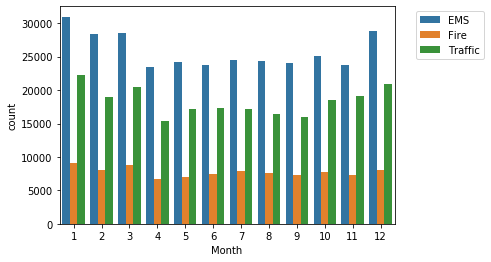

In [27]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

In [28]:
byMonth = df.groupby('Month').count()

In [29]:
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Cause,Hour,Day of Week
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,57739,57739,57739,51174,57739,57739,57716,57739,57739,57739,57739,57739,57739
4,45428,45428,45428,39810,45428,45428,45414,45428,45428,45428,45428,45428,45428
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467,48467
6,48493,48493,48493,42223,48493,48493,48466,48493,48493,48493,48493,48493,48493
7,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571,49571,49571
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,47213


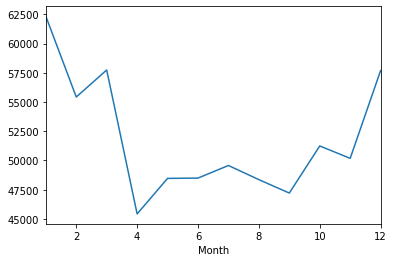

In [30]:
byMonth['lat'].plot()

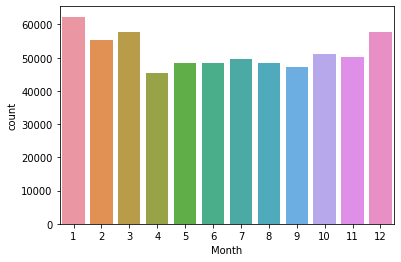

In [31]:
sns.countplot(x='Month',data=df)


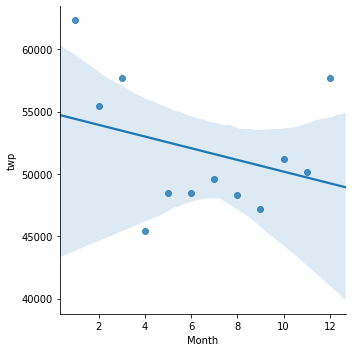

In [32]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [33]:
df['date'] = df['timeStamp'].apply(lambda time:time.date())

In [34]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Cause,Hour,Month,Day of Week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,16,12,Thu,2015-12-10


In [35]:
byDate = df.groupby('date').count()

In [36]:
byDate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Cause,Hour,Month,Day of Week
date,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-18,292,292,292,267,292,292,292,292,292,292,292,292,292,292
2020-03-19,256,256,256,237,256,256,256,256,256,256,256,256,256,256
2020-03-20,295,295,295,268,295,295,295,295,295,295,295,295,295,295


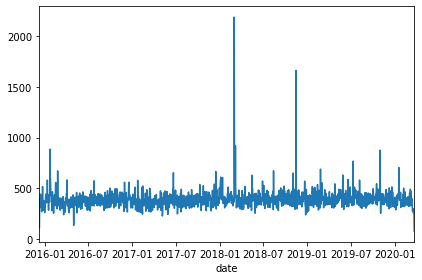

In [38]:
byDate['lat'].plot()
plt.tight_layout()

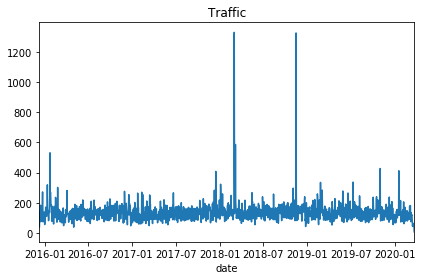

In [42]:
df[df['Reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

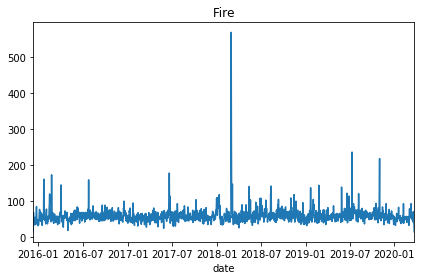

In [43]:
df[df['Reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

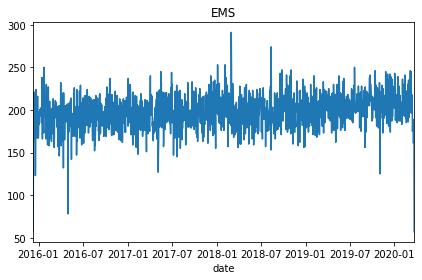

In [44]:
df[df['Reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [67]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

In [68]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1844,1509,1353,1227,1224,1535,2529,3958,4783,4977,...,6011,6613,6666,6741,5330,4749,4083,3631,3206,2675
Mon,1758,1451,1270,1178,1245,1716,2544,4233,5258,5405,...,5280,5789,5964,6052,5111,4204,3525,3028,2474,1924
Sat,2285,1938,1789,1495,1359,1471,1764,2377,3271,4074,...,5099,4863,4880,4900,4702,4474,3889,3653,3022,2788
Sun,2285,2015,1827,1513,1386,1376,1636,2254,2835,3513,...,4400,4186,4230,4223,4109,3893,3485,2929,2429,2168
Thu,1604,1300,1316,1154,1182,1664,2669,4258,5076,5089,...,5652,6082,5972,6571,5200,4397,3828,3277,2657,2206
Tue,1595,1353,1239,1134,1161,1639,2647,4207,5353,5270,...,5543,5896,6127,6541,5317,4303,3596,3193,2517,1974
Wed,1553,1377,1185,1178,1037,1497,2528,4450,5220,5134,...,5591,6098,6357,6639,5319,4402,3842,3293,2616,2062


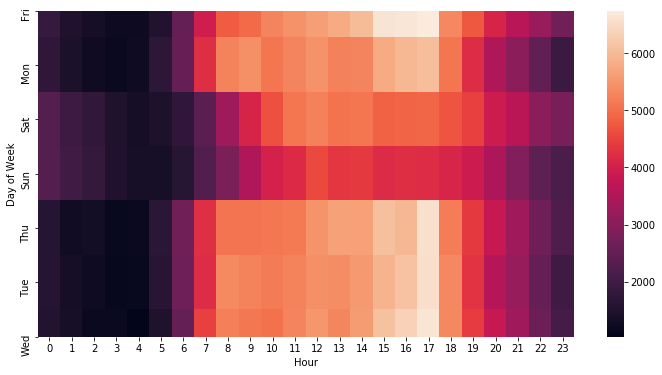

In [71]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

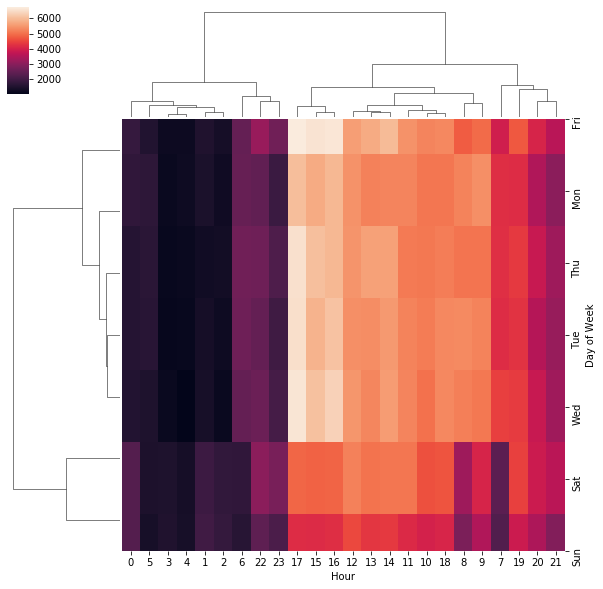

In [72]:
sns.clustermap(dayHour)

In [73]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

In [74]:
dayMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10681,6922,7214,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,7530,7170,6746,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,7866,6530,5796,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6407,5911,5410,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8594,6147,7524,7850,6964,7508,6954,7482,8358,8151
Tue,9714,8087,7895,6487,7835,6689,7637,7291,6601,7948,7344,8305
Wed,9409,8296,8766,6261,7942,7055,6976,7984,6844,7876,7410,7682


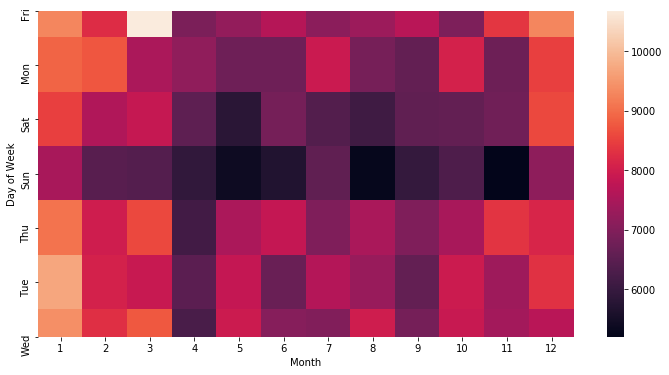

In [76]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)

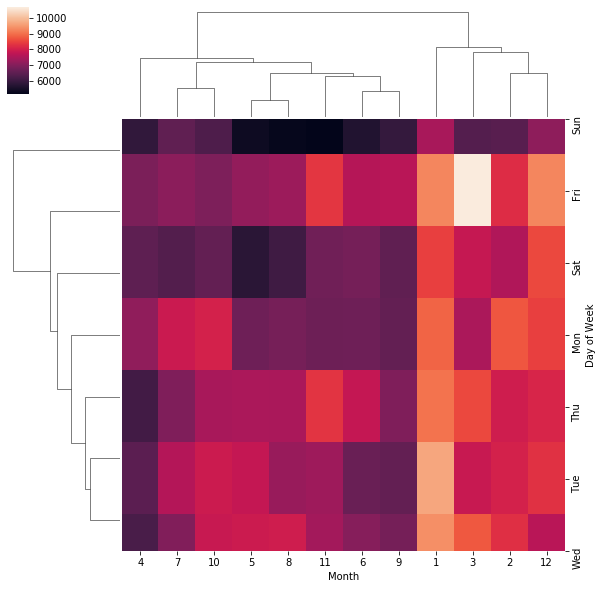

In [77]:
sns.clustermap(dayMonth)